Data Information:

    The project consists of two data files. One contains a compact set of events from a randomly selected hockey game, while the other provides Expected Goals (xg) values only for shots that hit the net. Any xg value that doesn't correspond to a shot event should not be counted.

    X and Y coordinates are measured in feet and are adjusted to ensure that both teams shoot in the same direction.

    Line Carry events are flagged when the puck is carried over either the blue line or the center ice red line.

    Binary columns with values of 0 or 1 indicate 0=No, 1=Yes.

    Successful passes are completed passes, and successful shots are shots on the net.

In [28]:
#Author : Walid Boudehane
import math
import pandas as df
import numpy as np
import matplotlib.pyplot as plt

game_data=df.read_csv("random_game_events.csv")
xg_data=df.read_csv("expected_goals.csv")

In [19]:
# Get a list of unique team ids from the game_data
teams = list((game_data.teamid).drop_duplicates())

# Select all goals scored by team 1 (identified by the first team id in the list)
team1 = game_data[(game_data.goal == 1) & (game_data.teamid == teams[0])]

# Select all goals scored by team 2 (identified by the second team id in the list)
team2 = game_data[(game_data.goal == 1) & (game_data.teamid == teams[1])]

# Calculate the number of goals scored by team 1 and team 2
goals_team1 = ((team1.groupby('teamid')['goal'].count().reset_index()).goal).iloc[0]
goals_team2 = ((team2.groupby('teamid')['goal'].count().reset_index()).goal).iloc[0]

# Compare the number of goals scored
if goals_team1 > goals_team2:
    print("The team 1 won the game and the score was:", goals_team1, "-", goals_team2)
elif goals_team2 > goals_team1:
    print("The team 2 won the game and the score was:", goals_team2, "-", goals_team1)
else:
    print("The match ended in a draw and the score was:", goals_team1, "-", goals_team2)



# Join the two tables 
team1_xg = df.merge(team1, xg_data, on='compiledgametime')
team2_xg = df.merge(team2, xg_data, on='compiledgametime')

# Calculate xg count for each team
count_xg_team1 = team1_xg.groupby('teamid_x')['xg'].count().iloc[0]
count_xg_team2 = team2_xg.groupby('teamid_x')['xg'].count().iloc[0]

# Print xg count for each team
print("Team 1 xg count:", count_xg_team1)
print("Team 2 xg count:", count_xg_team2)

# Determine which team has the better xg
if count_xg_team1 > count_xg_team2:
    print("Team 1 has the better xg.")
elif count_xg_team1 < count_xg_team2:
    print("Team 2 has the better xg.")
else:
    print("Both teams have the same xg count.")

The team 1 won the game and the score was: 4 - 1
Team 1 xg count: 4
Team 2 xg count: 1
Team 1 has the better xg.


# identify the likely xCoord of each blueline


### Left blue line x-coordinate is 0 and the right blue line x-coordinate is 60.12751770019531

In [20]:

# same as data_game
events = df.read_csv("Tutorial22_df.csv")

# filter the DataFrame to only include events at or beyond the blue lines
blue_line_events = events[(events["zone"] == "oz") | (events["zone"] == "nz")]

# sort the events by x-coordinate
sorted_events = blue_line_events.sort_values(by="xcoord")

# find the indices of the two events closest to the left and right blue lines
left_indices = sorted_events.index[sorted_events["xcoord"] < -60][-2:]
right_indices = sorted_events.index[sorted_events["xcoord"] > 60][:2]

# get the x-coordinate of the two closest events on each side of the ice
left_xcoords = sorted_events.loc[left_indices, "xcoord"].values
right_xcoords = sorted_events.loc[right_indices, "xcoord"].values

# calculate the x-coordinate of the left and right blue lines as the midpoint
# between the two closest events on each side of the ice
left_blueline_x = (left_xcoords.sum() / 2)
right_blueline_x = (right_xcoords.sum() / 2)

# print the x-coordinate of the left and right blue lines
print("Left blue line x-coordinate:", left_blueline_x)
print("Right blue line x-coordinate:", right_blueline_x)

Left blue line x-coordinate: 0.0
Right blue line x-coordinate: 60.12751770019531


### For team 1, they created chances and were able to convert those chances into goals , also they were luckiest to score a goal from a long distance . For team 2, they created chances but were not efficient and  unlucky.

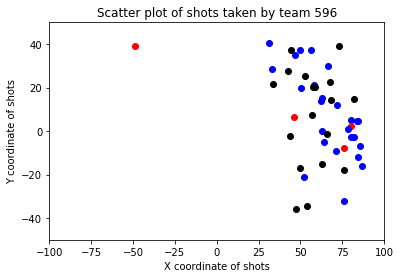

In [26]:
# Filter the game data to include only shots
# Filter the shots data to include only shots taken by team 1 #team 596
all_shots=game_data[(game_data.eventname == "shot")]
team1_shots = game_data[(game_data.eventname == "shot") & (game_data.teamid == teams[0])]


# Create lists for the shot outcomes, goals, x-coordinates, and y-coordinates
shot_outcome_team1 = list(team1_shots.outcome)
goal = list(team1_shots.goal)
xcoord_team1 = list(team1_shots.xcoord)
ycoord_team1 = list(team1_shots.ycoord)

# Create a scatter plot for the shots taken by team 724
for i in range(len(shot_outcome_team1)):
    if goal[i] == 1:# Red points represent goals
        plt.scatter(xcoord_team1[i], ycoord_team1[i], color='red')
    elif shot_outcome_team1[i] == "successful":# Blue points represent successful shots
        plt.scatter(xcoord_team1[i], ycoord_team1[i], color='blue')
    else: # Black points represent failed shots
        plt.scatter(xcoord_team1[i], ycoord_team1[i], color='black')

# Add labels and title to the plot
plt.xlabel("X coordinate of shots")
plt.ylabel("Y coordinate of shots")
plt.title("Scatter plot of shots taken by team 596")

# Set the x-axis and y-axis limits
plt.xlim(-100, 100)
plt.ylim(-50, 50)

# Show the plot
plt.show()



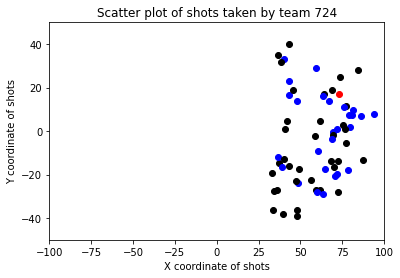

In [25]:
# Filter the shots data to include only shots taken by team 2 #team 724
team2_shots = game_data[(game_data.eventname == "shot") & (all_shots.teamid == teams[1])]


# Create lists for the shot outcomes, goals, x-coordinates, and y-coordinates
shot_outcome_team2 = list(team2_shots.outcome)
goal = list(team2_shots.goal)
xcoord_team2 = list(team2_shots.xcoord)
ycoord_team2 = list(team2_shots.ycoord)

# Create a scatter plot for the shots taken by team 724
for i in range(len(shot_outcome_team2)):
    if goal[i] == 1:# Red points represent goals
        plt.scatter(xcoord_team2[i], ycoord_team2[i], color='red')
    elif shot_outcome_team2[i] == "successful":# Blue points represent successful shots
        plt.scatter(xcoord_team2[i], ycoord_team2[i], color='blue')
    else: # Black points represent failed shots
        plt.scatter(xcoord_team2[i], ycoord_team2[i], color='black')

# Add labels and title to the plot
plt.xlabel("X coordinate of shots")
plt.ylabel("Y coordinate of shots")
plt.title("Scatter plot of shots taken by team 724")

# Set the x-axis and y-axis limits
plt.xlim(-100, 100)
plt.ylim(-50, 50)

# Show the plot
plt.show()


## the centre of the net that teams shoot at is located at xCoord=89, yCoord=0
### The distance of the furthest goal scored is : 143.4863266591984
### bThe xg of the furthest goal is 0.004219182 and  this is because shots taken from longer distances are generally more difficult to score and are less likely to result in a goal.

In [22]:

xCoord=89
yCoord=0

all_shots = game_data[game_data.eventname == "shot"]
goal_shots= game_data[game_data.goal==1]
shots_distance=[]
for i in range (len(all_shots.xcoord)):
    shots_distance.append(math.sqrt((list(all_shots.xcoord)[i]- xCoord)**2 + (list(all_shots.ycoord)[i]- yCoord)**2))
goals_distance=[]

for i in range (len(goal_shots.xcoord)): 
    goals_distance.append(math.sqrt((list(goal_shots.xcoord)[i]- xCoord)**2 + (list(goal_shots.ycoord)[i]- yCoord)**2))
    
goal_time=list(goal_shots.compiledgametime)

#the furthest goal was :
furthestDistance=max(goals_distance)
print("the furthest distance : ",furthestDistance)

#the expected goals (xg) value of this furthest goal :
index_futhest_goal=goals_distance.index(furthestDistance)
furthest_goal_time=goal_time[index_futhest_goal]


xg_furthest_goal=float(xg_data[xg_data.compiledgametime==furthest_goal_time].xg)
print("The xg of the furthest distance :",xg_furthest_goal)


the furthest distance :  143.4863266591984
The xg of the furthest distance : 0.004219182


###  "Shot Assist" is defined as a sequence of events with the same possessionid where there is: 1) a successful pass followed by 2) a successful reception by a teammate and then without giving up the puck 3) the receiving player has a shot attempt. 


### The player with the most assisted shots is  45223 with  1 assisted shots

In [23]:
# Add a column for Shot Assist, initialized with zeros
game_data['Shot Assist'] = 0

# Use shift() to check if a shot attempt is preceded by a successful pass and reception by the same team
for index, event in game_data.iterrows():
    if event['eventname'] == 'shot':
        reception_event = game_data.loc[index-1]  
        if (reception_event['eventname'] == 'reception' and
                reception_event['teamid'] == event['teamid'] and  # changed to compare to current event
                reception_event['possessionid'] == event['possessionid'] and  # changed to compare to current event
                reception_event['playerid'] == event['playerid']):
                previous_event = game_data.loc[index-2]           # changed to compare to current event
                if (previous_event['eventname'] == 'pass' and 
                    previous_event['teamid'] == event['teamid'] and 
                    previous_event['possessionid'] == event['possessionid']):
                    # Set the Shot Assist flag to 1 for the pass even 
                    game_data.at[index, 'Shot Assist'] = 1
                    
                    
                

assisted_shots = game_data.groupby('playerid')['Shot Assist'].sum().reset_index()


most_assisted_player = assisted_shots.sort_values('Shot Assist', ascending=False).iloc[0]

# Print the results
print("The player with the most assisted shots is ",most_assisted_player['playerid'], "with ",most_assisted_player['Shot Assist'],"assisted shots.")


The player with the most assisted shots is  45223 with  0 assisted shots.


### The highest xg among the goals that were scored  is 0.999534607 and  it was this high because Because the shooter was facing the net and the opponent's net was empty (no goalkeeper).

In [24]:
# Create a list of compiledgametime values when a goal was scored
time_goal_scored = list(game_data[game_data["goal"] == 1]["compiledgametime"])

# Select the rows from xg_data where the compiledgametime matches the time_goal_scored list
high_xg = xg_data[xg_data["compiledgametime"].isin(time_goal_scored)]

# Sort the high_xg dataframe by the "xg" column in descending order and select the first row (highest xg)
high_xg_sorted = high_xg.sort_values(["xg"], ascending=False).iloc[0]

# Print the highest xg value and the corresponding compiledgametime
print("The highest xg among the goals is:", high_xg_sorted.xg, "at time:", high_xg_sorted.compiledgametime)

# Sort the game_data dataframe by the "compiledgametime" column in descending order 
game_data_sorted = game_data.sort_values("compiledgametime", ascending=False)

The highest xg among the goals is: 0.999534607 at time: 3553.5
